In [1]:
import numpy as np
import pandas_datareader as web
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from fredapi import Fred

np.random.seed(42)

In [4]:
# Carico i pesi ottimi del portafoglio che ho calcolato nel file get_portfolio_weights.ipynb
df_optimal_weights= pd.read_csv("df_optimal_weights.csv")
df_optimal_weights= df_optimal_weights.to_numpy()

# Carico i pesi del portafoglio equally weighted che ho calcolato nel file get_portfolio_weights.ipynb
df_equally_weighted_portfolio_weights= pd.read_csv("df_equally_weighted_portfolio_weights.csv")
df_equally_weighted_portfolio_weights= df_equally_weighted_portfolio_weights.to_numpy()

# Carico i dati sui prezzi che erano stati salvati in stocks_data_adj_close.csv nel file get_features.ipynb
stocks_data_adj_close= pd.read_csv("stocks_data_adj_close.csv")
tickers = stocks_data_adj_close.columns.tolist()

In [11]:
# Funzione che calcola i rendimenti percentuali settimanali
def get_weekly_returns(stocks_data_adj_close):
    stocks_data_adj_close = stocks_data_adj_close.set_index("Date")
    stocks_data_adj_close.index = pd.to_datetime(stocks_data_adj_close.index)

    # Faccio il resample dei dati a cadenza settimanale (usando la chiusura del venerdì)
    weekly_data = stocks_data_adj_close.resample('W-FRI').last()
    # Calcolo i rendimenti settimanali
    weekly_returns = weekly_data.pct_change().dropna().to_numpy()

    return weekly_returns

# Funzione per analizzare le performance di un portafoglio dati alcuni dati sui titoli e pesi
def calculate_portfolio_performance(weekly_returns, weights, plot_title= "Rendimento Cumulato del Portafoglio", savefig_name= "name.jpg"):

    # Calcolo il rendimento settimanale del portafoglio pesato
    rendimento_portafoglio = np.sum(weights * weekly_returns, axis=1)

    # Calcolo il rendimento cumulato
    rendimento_cumulato = np.cumprod(1 + rendimento_portafoglio) - 1

    # Calcolo il rendimento medio annuo e la deviazione standard annua
    rendimento_medio_annuo = np.mean(rendimento_portafoglio) * 52
    deviazione_standard_annua = np.std(rendimento_portafoglio) * np.sqrt(52)

    # Rappresentazione grafica
    plt.figure(figsize=(10, 6))
    plt.plot(rendimento_cumulato, label='Rendimento Cumulato') #marker='o'
    plt.title(plot_title)
    plt.xlabel('Settimane')
    plt.ylabel('Rendimento Cumulato')
    plt.grid(True)

    # Aggiungo annotazioni per il rendimento medio annuo e la deviazione standard annua
    textstr = '\n'.join((
        f'Rendimento Medio Annuo: {rendimento_medio_annuo:.2%}',
        f'Deviazione Standard Annua: {deviazione_standard_annua:.2%}'))
    
    # Caratteristiche del box con rendimento medio e deviazione standard annua
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.gca().text(0.02, 0.90, textstr, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', bbox=props)
    
    plt.legend()
    plt.savefig(savefig_name)
    plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def compare_portfolio_performance(weekly_returns, weights_custom, weights_equal, plot_title="Portafoglio Equal-Weighted vs Random Forest", savefig_name="name.jpg", nome_p1= "Portafoglio 1", nome_p2= "Portafoglio 2"):
    # Calcolo il rendimento settimanale dei portafogli pesati
    rendimento_portafoglio_custom = np.sum(weights_custom * weekly_returns, axis=1)
    rendimento_portafoglio_equal = np.sum(weights_equal * weekly_returns, axis=1)

    # Calcolo il rendimento cumulato per entrambi i portafogli
    rendimento_cumulato_custom = np.cumprod(1 + rendimento_portafoglio_custom) - 1
    rendimento_cumulato_equal = np.cumprod(1 + rendimento_portafoglio_equal) - 1

    # Calcolo il rendimento medio annuo e la deviazione standard annua per entrambi i portafogli
    rendimento_medio_annuo_custom = np.mean(rendimento_portafoglio_custom) * 52
    deviazione_standard_annua_custom = np.std(rendimento_portafoglio_custom) * np.sqrt(52)
    
    rendimento_medio_annuo_equal = np.mean(rendimento_portafoglio_equal) * 52
    deviazione_standard_annua_equal = np.std(rendimento_portafoglio_equal) * np.sqrt(52)

    # Rappresentazione grafica
    plt.figure(figsize=(10, 6))
    plt.plot(rendimento_cumulato_equal, label=f'Rendimento Cumulato ({nome_p1})', color='red')
    plt.plot(rendimento_cumulato_custom, label=f'Rendimento Cumulato ({nome_p2})', color='green')
    plt.title(plot_title)
    plt.xlabel('Settimane')
    plt.ylabel('Rendimento Cumulato')
    plt.grid(True)

    # Aggiungo annotazioni per il rendimento medio annuo e la deviazione standard annua
    textstr_equal = '\n'.join((
        f'Rendimento Medio Annuo ({nome_p1}): {rendimento_medio_annuo_equal:.2%}',
        f'Deviazione Standard Annua ({nome_p1}): {deviazione_standard_annua_equal:.2%}'))
    
    textstr_custom = '\n'.join((
        f'Rendimento Medio Annuo ({nome_p2}): {rendimento_medio_annuo_custom:.2%}',
        f'Deviazione Standard Annua ({nome_p2}): {deviazione_standard_annua_custom:.2%}'))

    # Caratteristiche del box con rendimento medio e deviazione standard annua
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.gca().text(0.02, 0.73, textstr_equal, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', bbox=props)
    
    plt.gca().text(0.02, 0.85, textstr_custom, transform=plt.gca().transAxes, fontsize=12,
                   verticalalignment='top', bbox=props)
    
    plt.legend()
    plt.savefig(savefig_name)
    plt.show()


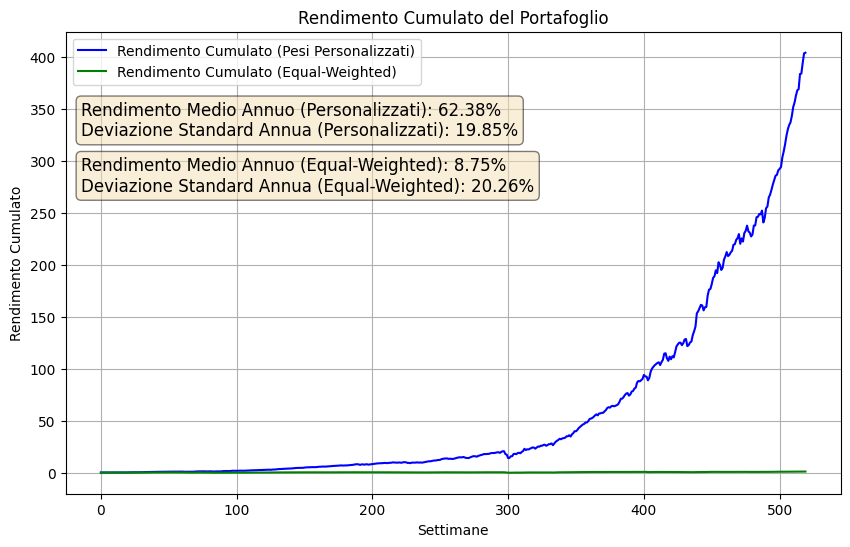

In [22]:
compare_portfolio_performance(get_weekly_returns(stocks_data_adj_close), df_optimal_weights, df_equally_weighted_portfolio_weights, plot_title="Rendimento Cumulato del Portafoglio", savefig_name="name.jpg")

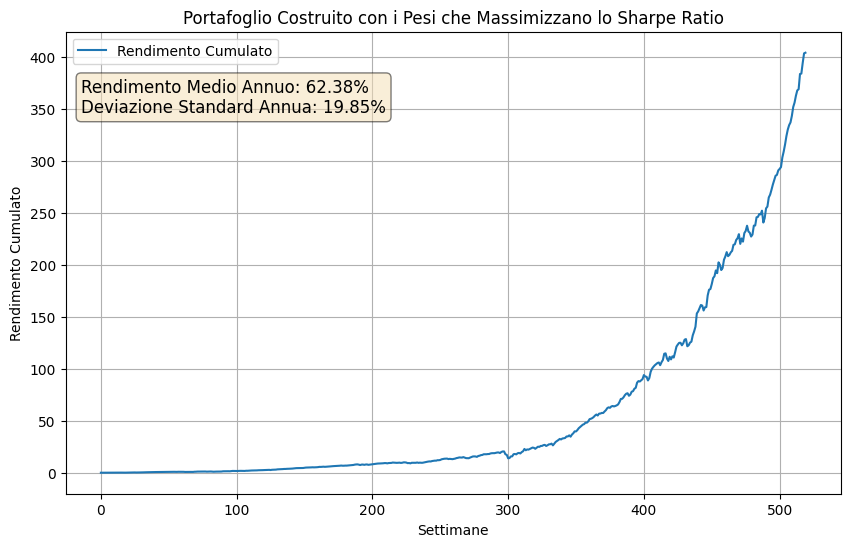

In [12]:
calculate_portfolio_performance(get_weekly_returns(stocks_data_adj_close), df_optimal_weights, plot_title= "Portafoglio Costruito con i Pesi che Massimizzano lo Sharpe Ratio", savefig_name= "Portafoglio_Pesi-Ottimi.jpg")

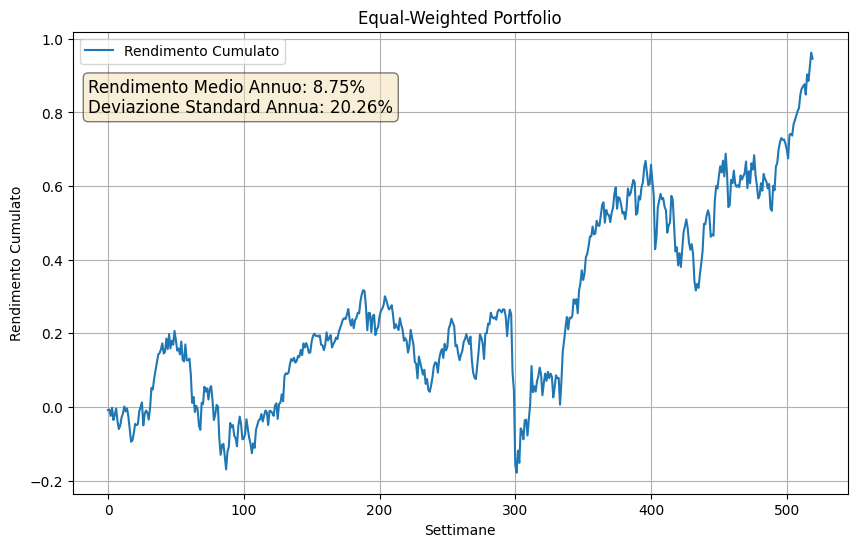

In [13]:
calculate_portfolio_performance(get_weekly_returns(stocks_data_adj_close), df_equally_weighted_portfolio_weights, plot_title= "Equal-Weighted Portfolio", savefig_name= "Portafoglio_Equal-Weighted.jpg")